In [3]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

from solutions_biv import additionalplot_solution_1, additionalplot_solution_2

We'll continue to make use of the fuel economy dataset in this workspace.

In [4]:
fuel_econ = pd.read_csv('./data/fuel_econ.csv')
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


**Task 1**: Plot the distribution of combined fuel mileage (column 'comb', in miles per gallon) by manufacturer (column 'make'), for all manufacturers with at least eighty cars in the dataset. Consider which manufacturer order will convey the most information when constructing your final plot. **Hint**: Completing this exercise will take multiple steps! Add additional code cells as needed in order to achieve the goal.

In [20]:
# YOUR CODE HERE
(fuel_econ['make'].value_counts() >= 80).sum()

18

In [93]:
THRESHOLD = 80
make_frequency = fuel_econ['make'].value_counts()
idx = np.sum(make_frequency > THRESHOLD)
idx

18

In [94]:
most_makes = make_frequency.index[:idx]
fuel_econ_sub = fuel_econ.loc[fuel_econ['make'].isin(most_makes)]

most_makes
fuel_econ_sub

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8
5,32209,Lexus,GS 350,2013,Midsize Cars,Rear-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,19.4325,24.1499,28.2234,38.5000,22.6002,393,6,6
6,32210,Lexus,GS 350 AWD,2013,Midsize Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,18.5752,23.5261,26.3573,36.2109,21.4213,412,5,5
7,32214,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Automatic 8-spd,Premium Gasoline,4,2.0,89,0,17.4460,21.7946,26.6295,37.6731,20.6507,432,5,5
8,32215,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Manual 6-spd,Premium Gasoline,4,2.0,89,0,20.6741,26.2000,29.2741,41.8000,23.8235,375,6,6
9,32216,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Automatic 8-spd,Premium Gasoline,6,3.8,89,0,16.4675,20.4839,24.5605,34.4972,19.3344,461,4,4
10,32217,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Manual 6-spd,Premium Gasoline,6,3.8,89,0,18.1909,22.8000,26.7761,37.9000,21.2581,420,5,5


In [97]:
make_means = fuel_econ_sub.groupby('make').mean()

comb_order = make_means.sort_values('comb', ascending = False).index

make_means
comb_order

Index(['Toyota', 'Honda', 'Mazda', 'Hyundai', 'Kia', 'MINI', 'Volkswagen',
       'Chevrolet', 'Ford', 'Lexus', 'Audi', 'BMW', 'Infiniti', 'Dodge',
       'Cadillac', 'Mercedes-Benz', 'Porsche', 'Jaguar'],
      dtype='object', name='make')

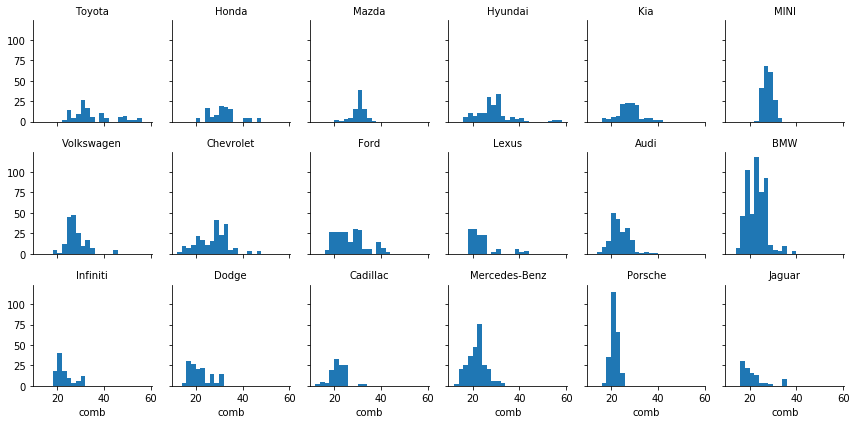

In [101]:
# plotting
g = sb.FacetGrid(data = fuel_econ_sub, col = 'make', col_wrap = 6, size = 2,
                     col_order = comb_order)

# try sb.distplot instead of plt.hist to see the plot in terms of density!
g.map(plt.hist, 'comb', bins = np.arange(12, fuel_econ_sub['comb'].max()+2, 2))
g.set_titles('{col_name}')

In [62]:
(fuel_econ['make'].value_counts() >= 80).sum()

18

In [88]:
xy = (fuel_econ['make'].value_counts()).head(18)

yz = fuel_econ.loc[fuel_econ['make'].isin(xy.index)]

z= yz.groupby('make').mean().sort_values('comb', ascending = False).reset_index()

z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 15 columns):
make         18 non-null object
id           18 non-null float64
year         18 non-null float64
cylinders    18 non-null float64
displ        18 non-null float64
pv2          18 non-null float64
pv4          18 non-null float64
city         18 non-null float64
UCity        18 non-null float64
highway      18 non-null float64
UHighway     18 non-null float64
comb         18 non-null float64
co2          18 non-null float64
feScore      18 non-null float64
ghgScore     18 non-null float64
dtypes: float64(14), object(1)
memory usage: 2.2+ KB


In [104]:
yz['comb'].describe()

count    3208.000000
mean       25.198091
std         5.956012
min        13.858000
25%        21.000000
50%        24.391000
75%        28.530925
max        57.782400
Name: comb, dtype: float64

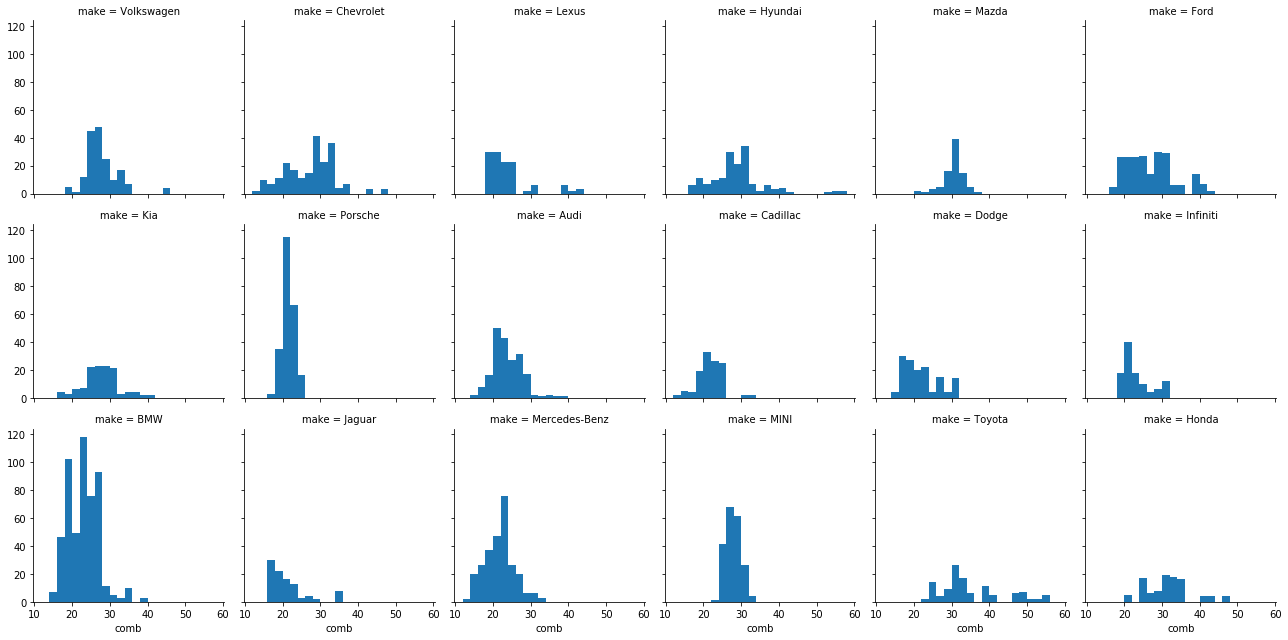

In [108]:
g = sb.FacetGrid(data = yz, col = 'make', col_wrap = 6, size = 3)

g.map(plt.hist, 'comb', bins = np.arange(12, yz['comb'].max()+2, 2))

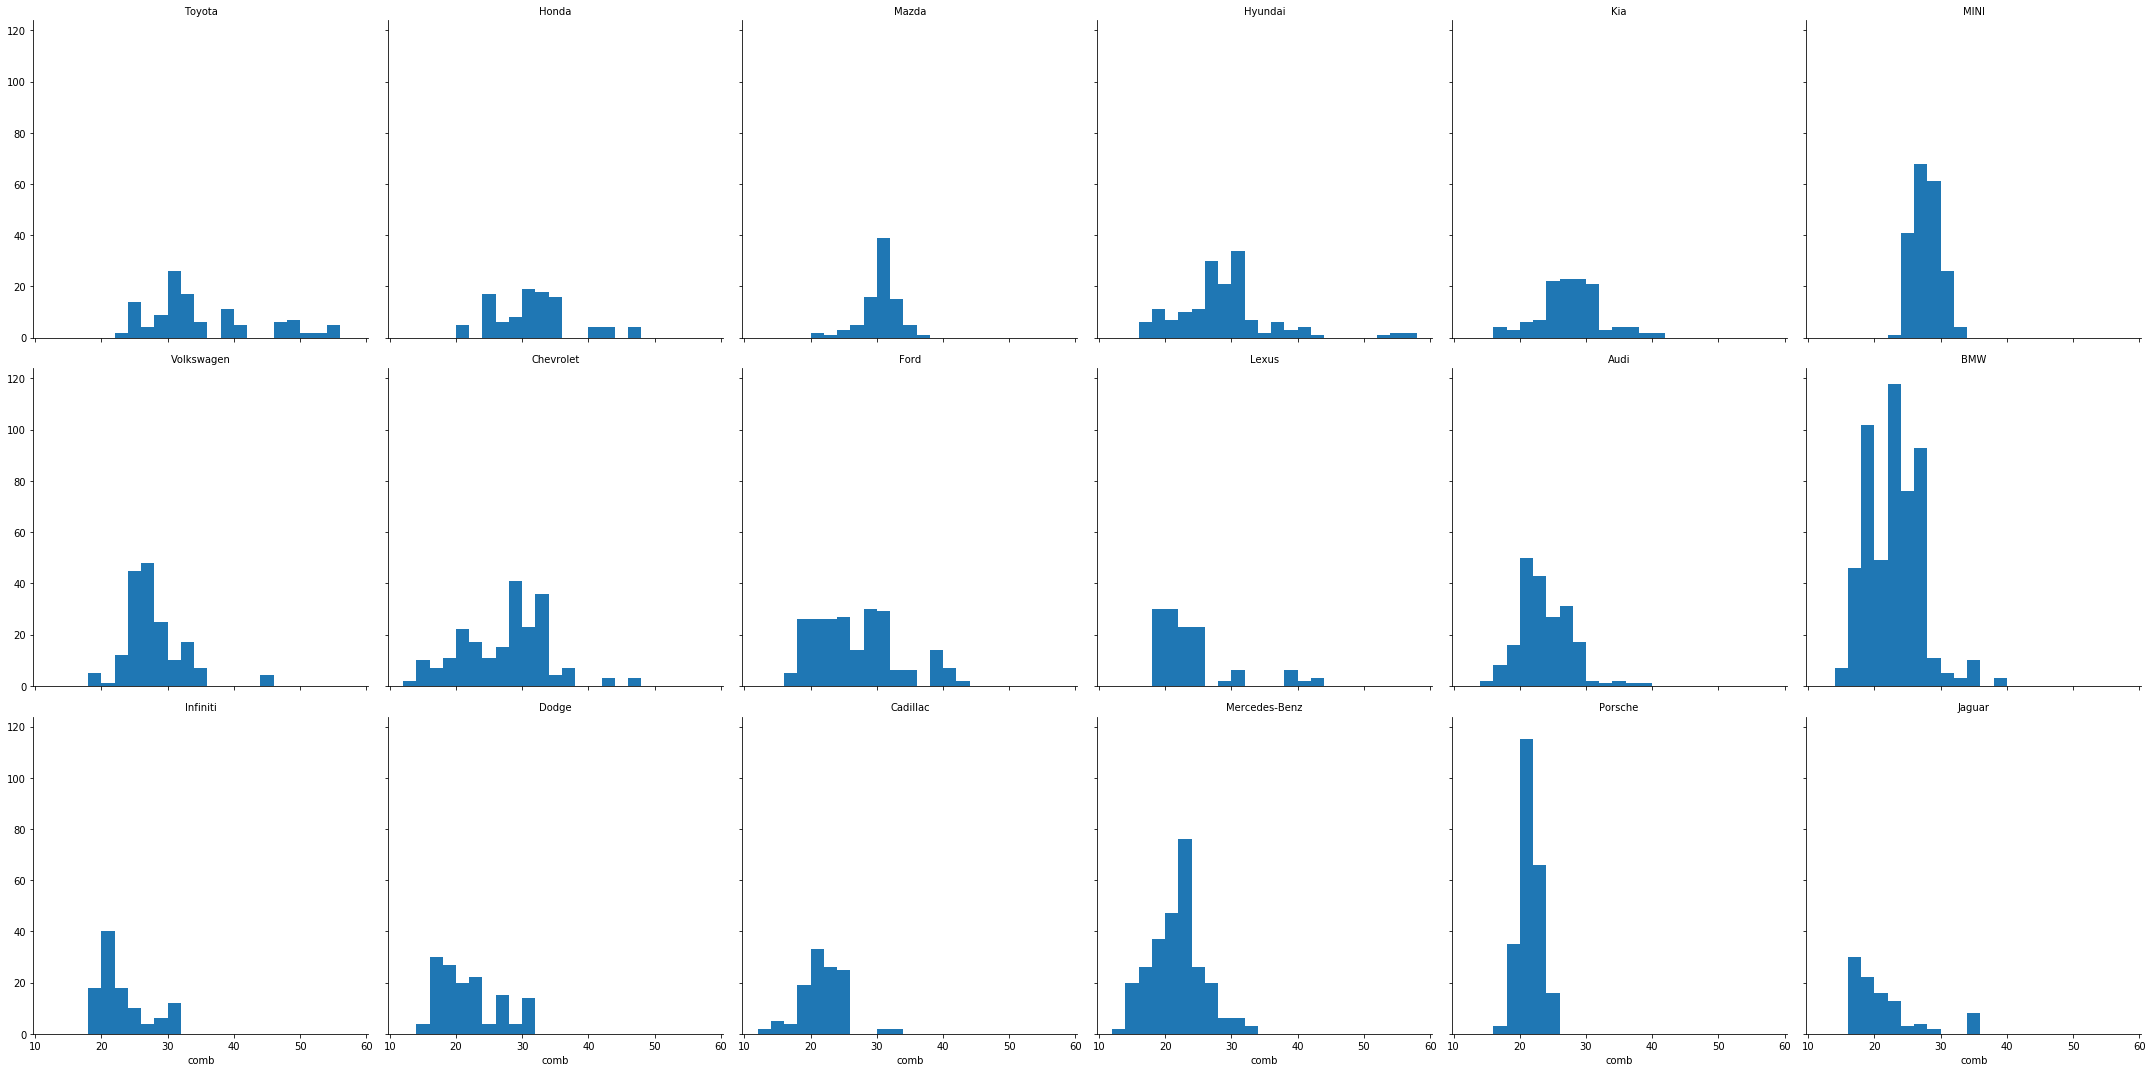

In [107]:
    
    THRESHOLD = 80
    make_frequency = fuel_econ['make'].value_counts()
    idx = np.sum(make_frequency > THRESHOLD)

    most_makes = make_frequency.index[:idx]
    fuel_econ_sub = fuel_econ.loc[fuel_econ['make'].isin(most_makes)]

    make_means = fuel_econ_sub.groupby('make').mean()
    comb_order = make_means.sort_values('comb', ascending = False).index

    # plotting
    g = sb.FacetGrid(data = fuel_econ_sub, col = 'make', col_wrap = 6, size = 5,
                     col_order = comb_order)
    # try sb.distplot instead of plt.hist to see the plot in terms of density!
    g.map(plt.hist, 'comb', bins = np.arange(12, fuel_econ_sub['comb'].max()+2, 2))
    g.set_titles('{col_name}')

Due to the large number of manufacturers to plot, I've gone with a faceted plot of histograms rather than a single figure like a box plot. As part of setting up the FacetGrid object, I have sorted the manufacturers by average mileage, and wrapped the faceting into a six column by three row grid. One interesting thing to note is that there are a very large number of BMW cars in the data, almost twice as many as the second-most prominent maker, Mercedes-Benz. One possible refinement could be to change the axes to be in terms of relative frequency or density to normalize the axes, making the less-frequent manufacturers easier to read.


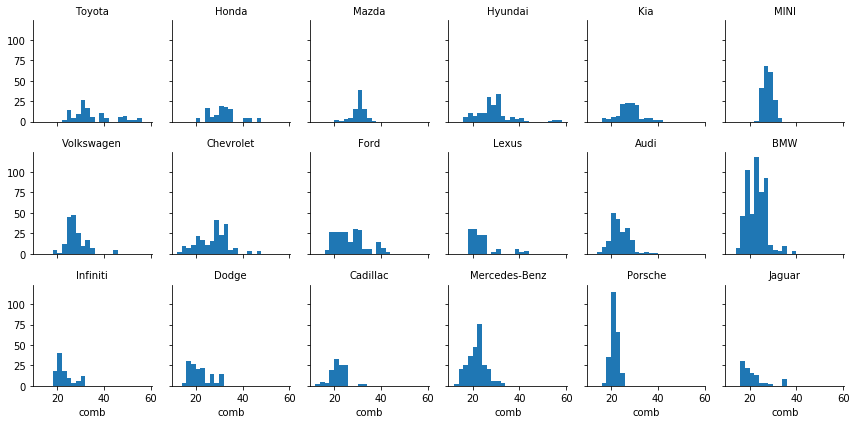

In [5]:
# run this cell to check your work against ours
additionalplot_solution_1()

**Task 2**: Continuing on from the previous task, plot the mean fuel efficiency for each manufacturer with at least 80 cars in the dataset.

In [112]:
# YOUR CODE HERE
sb.barplot(data = yz, x = 'comb', y = 'make', color = sb.color_palette()[0] ci='sd')


SyntaxError: invalid syntax (<ipython-input-112-8e2275120953>, line 2)

Seaborn's barplot function makes short work of this exercise. Since there are a lot of 'make' levels, I've made it a horizontal bar chart. In addition, I've set the error bars to represent the standard deviation of the car mileages.


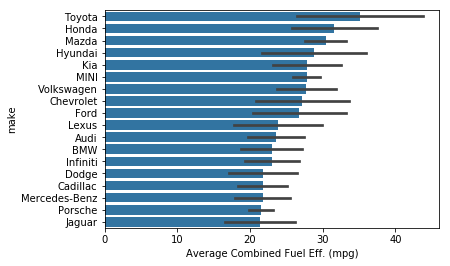

In [109]:
# run this cell to check your work against ours
additionalplot_solution_2()